# Customer Churn Analysis

Dataset Info : sample dataset containing customer data and showing customer left last months

In [62]:
##Import the dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [63]:
## Load the data file

In [64]:
df = pd.read_csv(r"CustomerChurn.csv")

In [65]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [66]:
### Check the various attribute of data like shape(rows and columns), columns, datatypes

In [67]:
df.shape

(7043, 21)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [69]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [70]:
## Check the datatypes of all the columns

In [71]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### Total charges should be in a numerical values but it is not
#### Senior citizen is a numerical values but should be a categorical

In [72]:
df.describe() ## Check the descriptive stats of numerical value

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


##### senior citizen is actually categorical hence the 25% - 50% -75% distribution is not proper
#### 75 % customer has tenure less than 55 months 
#### Average  months charges are USD 64.76 whereas 25% customer pay more than USD 89.85 per months

In [73]:
df["Churn"].value_counts() ## normal value counts

No     5174
Yes    1869
Name: Churn, dtype: int64

In [74]:
df["Churn"].value_counts()/len(df)*100 ## converted to percentage

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

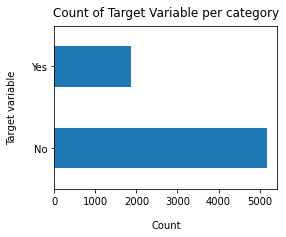

In [75]:
df["Churn"].value_counts().plot(kind='barh', figsize=(4,3))
plt.xlabel("Count",labelpad=14)
plt.ylabel("Target variable", labelpad=14)
plt.title("Count of Target Variable per category", y =1.02);

## The data should be in 1 : 1
- Data is highly imbalanced ratio = 73.27
- So we analyze the data with other feature while taking the target values seprately to get some insights

In [76]:
# df.info # instead of this we can use null values data and data types command

In [77]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [78]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [79]:
# The problem here is for total charges as it is in object so we have to convert into category   values

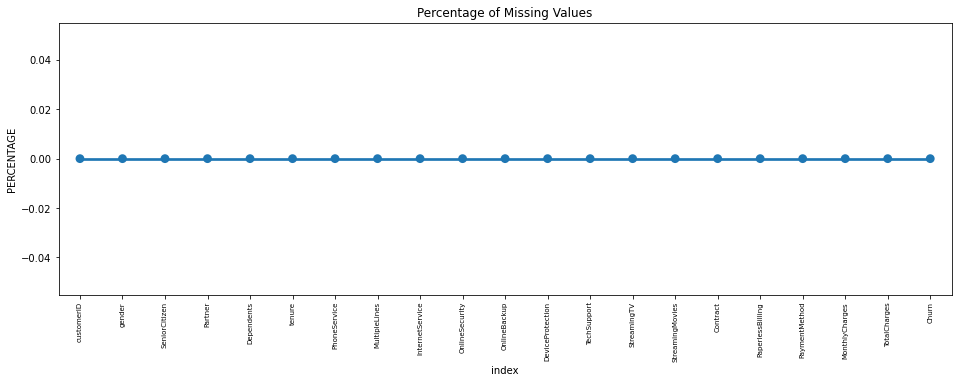

In [80]:
missing = pd.DataFrame((df.isnull().sum()) * 100 / df.shape[0]).reset_index()
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("PERCENTAGE")
plt.show()

# Missing data - Initail intution

- Here  we don't have any missing data

General Thumb rules:

- For feature with less missing values can use regression to predict the missing values or fill with mean of values present depending on the feature 
- As there no thumb's rule on what criteria do we delete the columns with high number of missing values but generally you can delete the columns if you have more then 30-40 % of missing values. But again there's a catch here for example Is_car and Car_type, People having o cars will obviously have Car_type as Nan (null) but that doesn't make this columns useless, so decission has to be taken wisely 
- For feature with high number of missing value - it is better to drop those columns as they give very less insights on analysis

## Data Cleaning

#### 1. Create a new copy of base data for manupulation & processing 

In [81]:
new_df = df.copy()

In [82]:
new_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### 2. Total charges should be numeric amount. lets convert to numeric

In [83]:
new_df['TotalCharges'] = pd.to_numeric(new_df['TotalCharges'], errors='coerce')
new_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### After converting to numeric value from object we can see that there are total 11 values which are total charges. which is 0.15 % of records

In [84]:
### 3. As we can see there are 11 missing values in TotalCharges columns. Let check these record

In [85]:
new_df.loc[new_df['TotalCharges'].isnull()==True] 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


### 4. Missing value treatment

#### Since % of these records are very low i.e. 0.15% it is safe to ignore them for further processing

In [86]:
# Remove missing values
new_df.dropna(how='any',inplace=True)

# Telco_data.fillna(0)

### 5. Divide the customer into bins based on tenure e.g. for tenure < 12 months : assign a tenure group if 1-12 for tenure between 1 to 2 yrs tenure group of 13-24 so on.....

In [87]:
# Feature binning

In [88]:
# Get the max tenure 
print(new_df['tenure'].max()) # 72

72


In [89]:
labels = ["{0}-{1}".format(i,i+11)for i in range(1,72,12)]
print(labels)

['1-12', '13-24', '25-36', '37-48', '49-60', '61-72']


In [90]:
# Group the tenure in bins of 12 months 
labels = ["{0}-{1}".format(i,i+11)for i in range(1,72,12)]

new_df['tenure_group'] = pd.cut(new_df.tenure, range (1,80,12),right = False, labels = labels)

In [91]:
new_df['tenure_group'].value_counts()

1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: tenure_group, dtype: int64

#### 6. Remove columns not required for processing

In [92]:
# drop customer id and tenure

In [93]:
new_df.drop(columns = ['customerID','tenure'],axis=1,inplace=True)

In [94]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


# Data Exploration

In [95]:
### 1, Plot distribution of individual predictor by churn

## Univariate Analysis

In [96]:
new_df.head(5)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


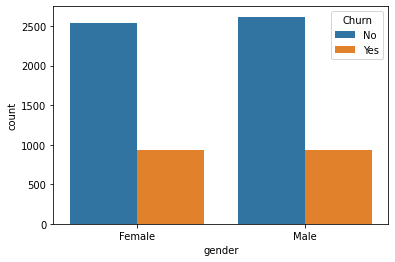

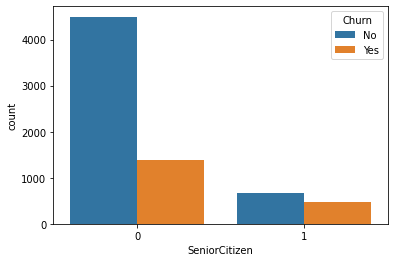

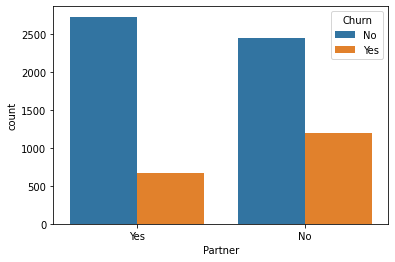

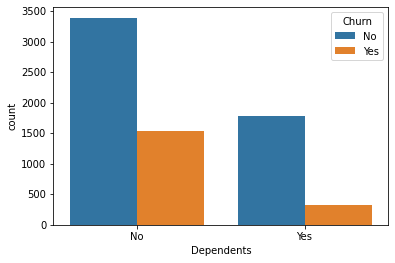

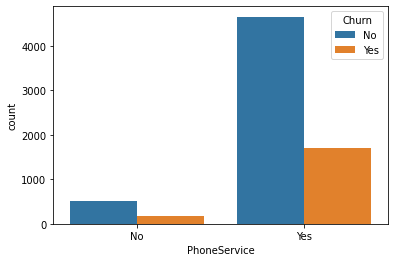

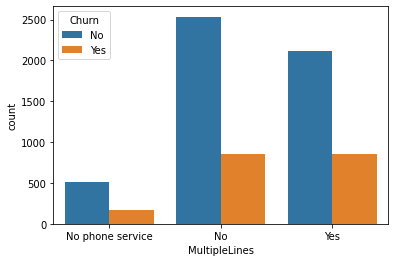

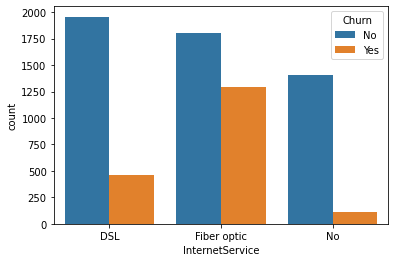

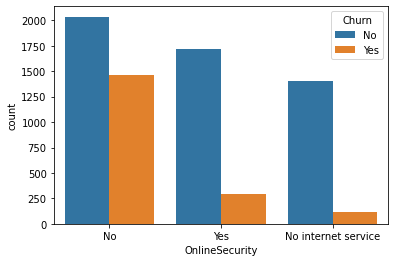

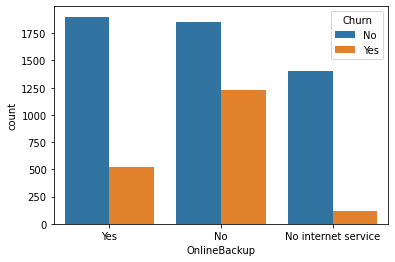

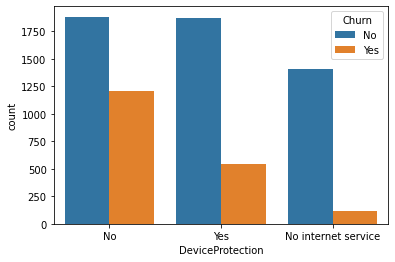

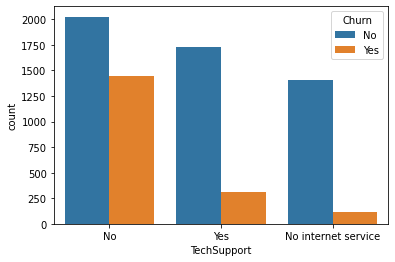

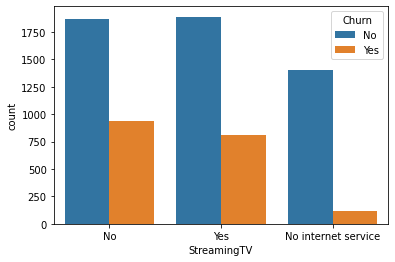

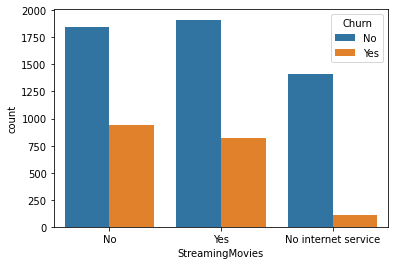

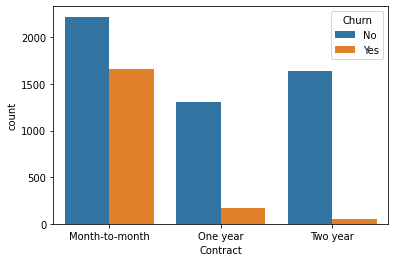

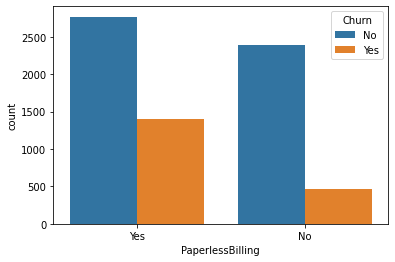

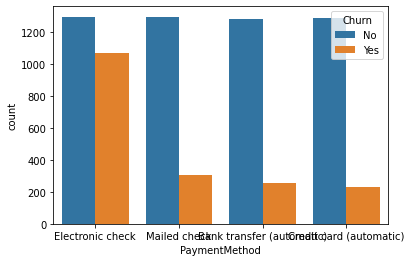

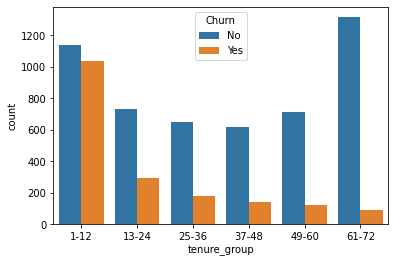

In [97]:
for i, predictor in enumerate(new_df.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=new_df,x=predictor,hue='Churn')
## Here we have to keep only (churn)independent variable and drop the dependent variable and numerical attributes

In [98]:
## Overall orignal data churn value counts
new_df.Churn.value_counts()/len(new_df)*100

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

In [103]:
## For Gender
# We are not able to get any insights from gender as its calculated value is same

In [105]:
##  Not Senior citizen
# Here values of not senior citizen who are not churned are 4500 and churned are 1300 total is 5800.
# Ratio is 1300/5800 i.e. 22.413
## So 22 % are not senior citizen are churning 

### Senior Citizen 
# Here senior citizen around 600 are churned and around 400 are not churned ehich is total 1000
# ratio is 400/1000 i..e 40 % are churning 

### 1) Here Senior citizens are most likely to churn

In [106]:
## For Partners 

### 2400 are not churned and 1300 are churned Here 35% people have chrn rates with no partner

### 2. People with no partners are mostly like to churn

In [107]:
## Contract 
## 41% of people are churning for month to month contract
## 13% of people are churning for one year contract
## 5 % of people are churning for two year 

### 3 Monthly Contract people are more likely to churn

In [108]:
# Payment method


## 4 People who pay via electronic check are more likely to churn

# Numerical Analysis

In [109]:
new_df.gender.value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

In [110]:
new_df1_target0 = new_df[new_df["Churn"]=='No']
new_df1_target1 = new_df[new_df["Churn"]=='Yes']

In [111]:
new_df1_target1.gender.value_counts()

Female    939
Male      930
Name: gender, dtype: int64

In [112]:
pd.crosstab(new_df.PaymentMethod, new_df.Churn)

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


In [113]:
## 2. Convert the target variable 'Churn'  in a binary numeric variable i.e Yes= 1, No = 0

In [114]:
new_df['Churn'] = np.where(new_df.Churn == 'Yes',1,0)

In [115]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


In [116]:
## 3 Convert the categorical variable into dummy variable 

In [117]:
new_df_dummies = pd.get_dummies(new_df)
new_df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


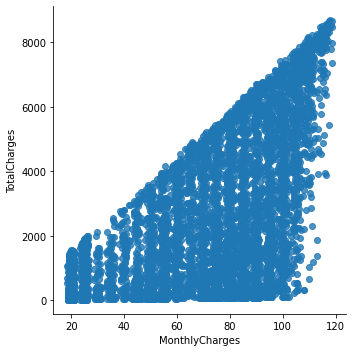

In [118]:
## Relation between monthly charges and Total carges
sns.lmplot(data=new_df_dummies, x = 'MonthlyCharges', y='TotalCharges', fit_reg=False)

In [119]:
new_df_dummies['MonthlyCharges'].corr(new_df_dummies['TotalCharges'])

0.6510648032262025

In [120]:
## Correlation values ranges from -1 to 1
## So we can see that above values is 0.65 it is nearest to 1 so it is Positively correlated

In [121]:
## Total charges increase as monthly charges increase as expected

## 4 Monthly charges and Total charges are positively corealted

- Churn by monthly charges and total charges

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  


Text(0.5, 1.0, 'Monthly Charges by churn')

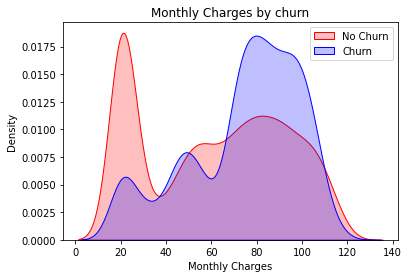

In [122]:
Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies["Churn"]==0)],
                 color='Red',shade=True)
Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies["Churn"]==1)],
                  ax =Mth, color='Blue',fill =True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly Charges by churn')

# 6, Churn is high when monthly charges are high

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  


Text(0.5, 1.0, 'Total Charges by churn')

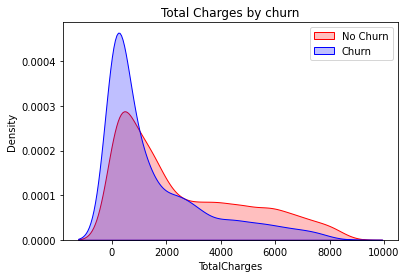

In [123]:
Mth = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies["Churn"]==0)],
                 color='Red',shade=True)
Mth = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies["Churn"]==1)],
                  ax =Mth, color='Blue',fill =True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('TotalCharges')
Mth.set_title('Total Charges by churn')

### Surprising insight as higher churn at lower charges

However if we combine the insight of 3 parameters i.e Tenure, Monthly charges & total charges then the picture is bit clear-
Higher monthly charges at lowe teure results into lower total charges Hence all these 3 factors viz Highly month charges Low tenur and lowe total charges are linked to High Churn

## Build corelation of all prediators with Churn 

<AxesSubplot:>

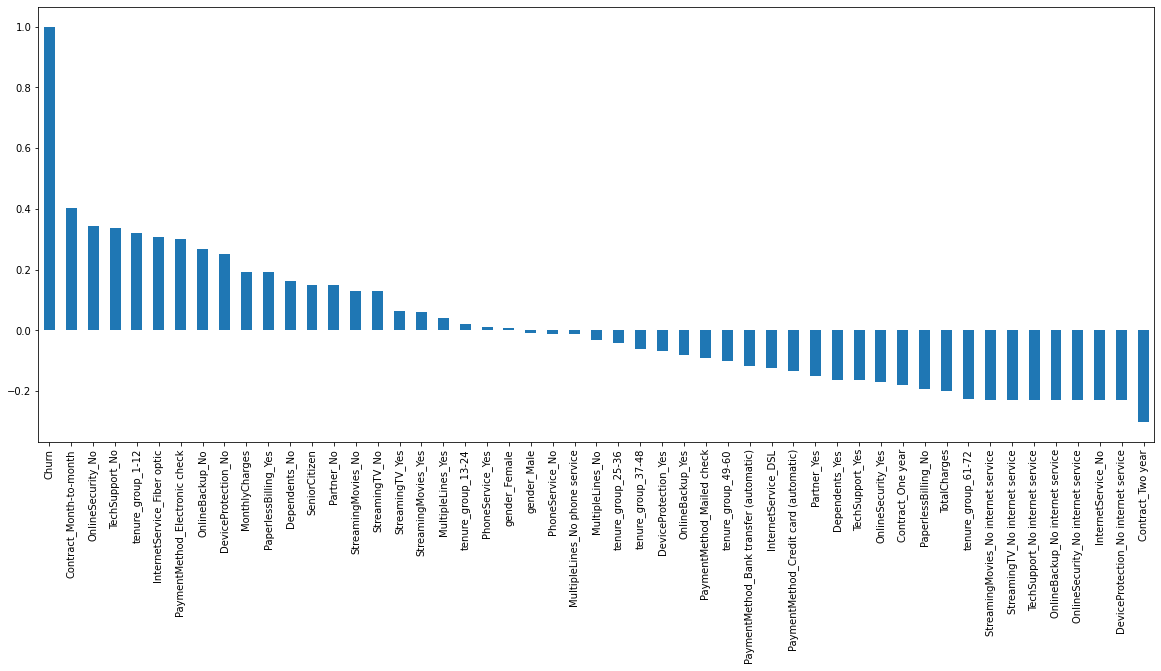

In [124]:
plt.figure(figsize=(20,8))
new_df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')

# 5) People who don't have online securities are high churner

# 6) people who dont have no tech support are high churner
# 7) people who are tenure group are more likely to churn

In [125]:
# "Derived Insights"

- High churn seen in case of month to month contracts. No online securities no tech support first year of subscription aand fibre optics internet 
- Low churn is seen in case of long term contract subscription without internet service and the customer engaged for 5 + years
- Factor like gender availibility of Phone Service and # of multiple lines have almost No impact on Churn
    - This is also evident from Heatmap below

<AxesSubplot:>

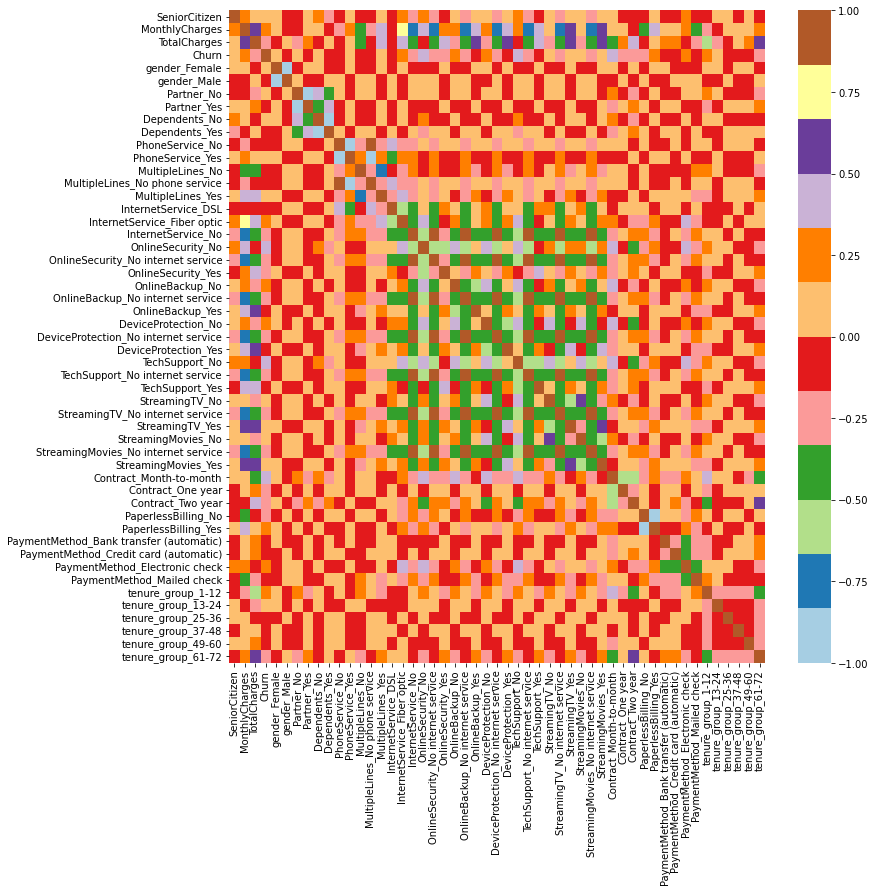

In [126]:
plt.figure(figsize=(12,12))
sns.heatmap(new_df_dummies.corr(), cmap='Paired')

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  
C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Tenure by churn')

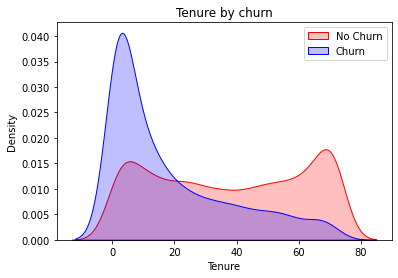

In [131]:
Tot = sns.kdeplot(df.tenure[(df["Churn"]=='No')],
                  color="Red", shade =True)
Tot = sns.kdeplot(df.tenure[(df["Churn"]=='Yes')],
                  ax= Tot, color="Blue", shade =True)
Tot.legend(["No Churn", "Churn"], loc="upper right")
Tot.set_ylabel('Density')
Tot.set_xlabel('Tenure')
Tot.set_title("Tenure by churn")

# Bivariate Analysis

In [137]:
new_df1_target0 = new_df.loc[new_df["Churn"]==0]
new_df1_target1 = new_df.loc[new_df["Churn"]==1]

In [138]:
len(new_df1_target0)

5163

In [139]:
len(new_df1_target1)

1869

In [140]:
def uniplot(df, col, title, hue = None):
    sns.set_style("whitegrid")
    sns.set_context("talk")
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams["axes.labelsize"] = 22
    plt.rcParams["axes.labelsize"] = 30
    
    temp = pd.Series(data=hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width, 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data=df, x = col, order =df[col].value_counts().index,hue=hue, palette='bright')
    plt.show()

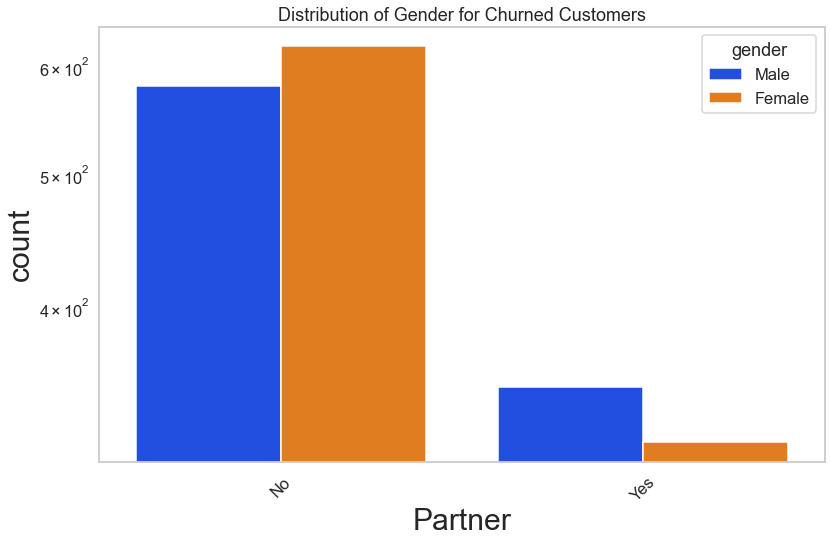

In [141]:
uniplot(new_df1_target1,col="Partner", title="Distribution of Gender for Churned Customers", hue='gender')

In [143]:
# Female with no partners are more likely to churn

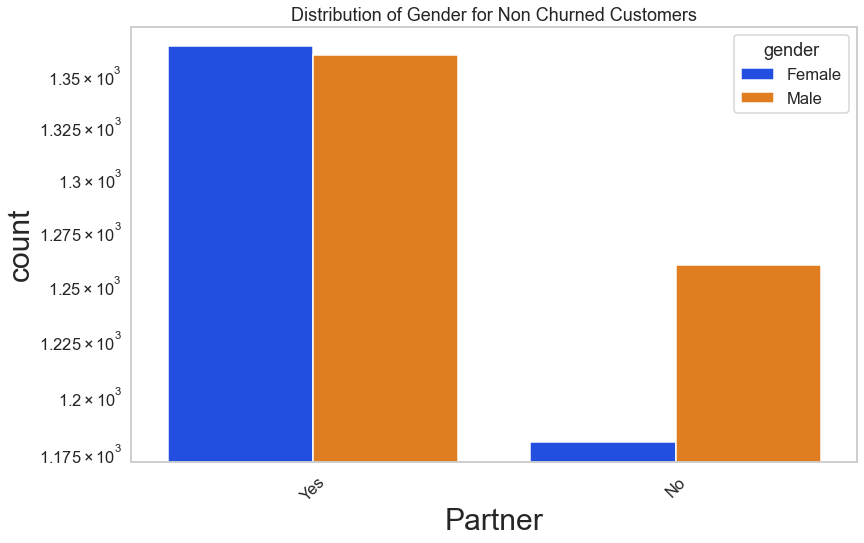

In [142]:
uniplot(new_df1_target0,col="Partner", title="Distribution of Gender for Non Churned Customers", hue='gender')

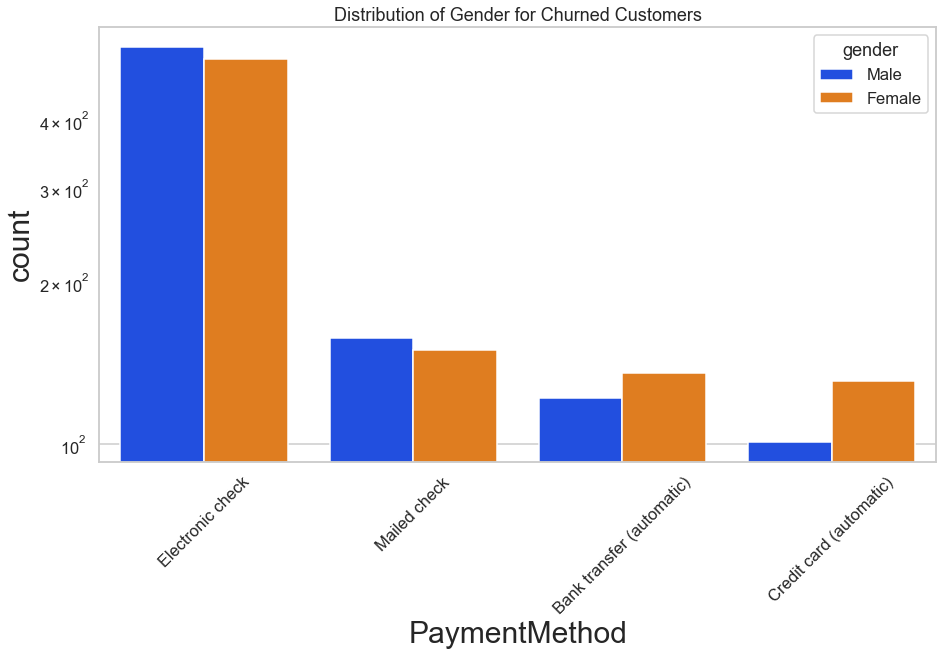

In [145]:
uniplot(new_df1_target1,col="PaymentMethod", title="Distribution of Gender for Churned Customers", hue='gender')

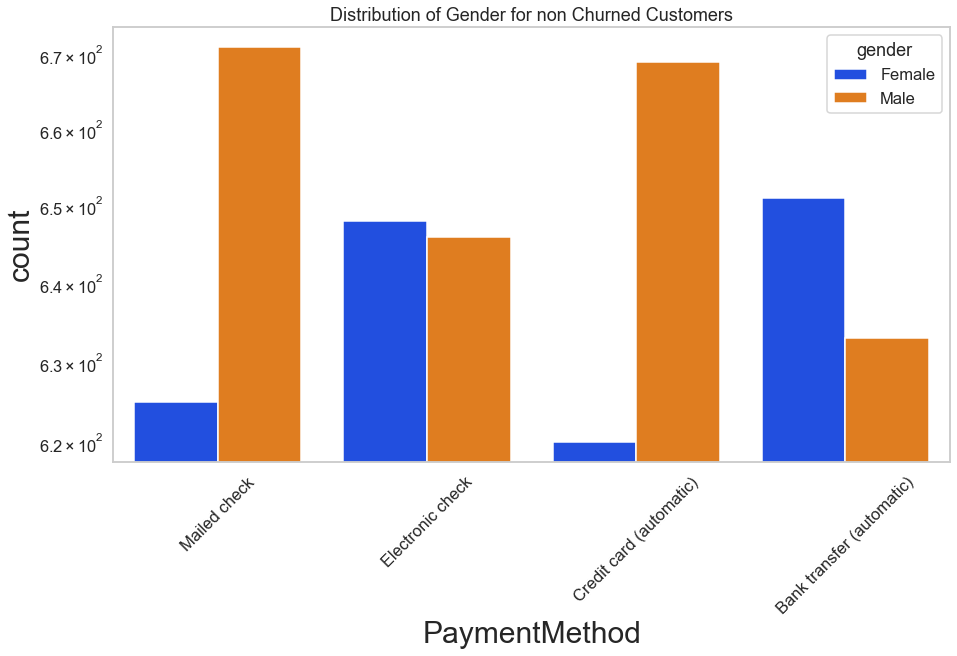

In [146]:
uniplot(new_df1_target0,col="PaymentMethod", title="Distribution of Gender for non Churned Customers", hue='gender')

In [147]:
## Female who pay  via credit cards are more likely to churn

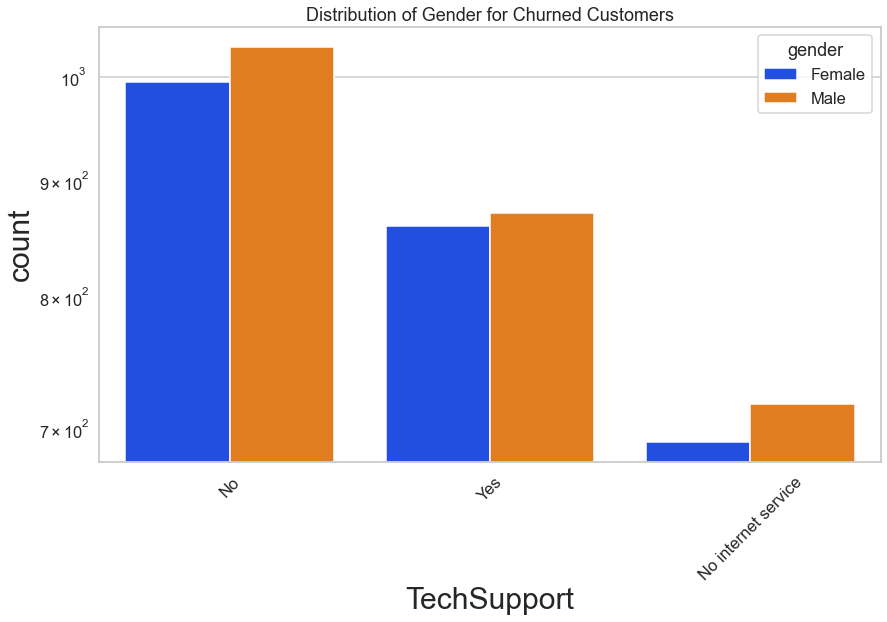

In [148]:
uniplot(new_df1_target0,col="TechSupport", title="Distribution of Gender for Churned Customers", hue='gender')

# Conclusion
- These are some of quick insights from this excercise:
    
##### 1) Electronic check medium are highest churners
##### 2) Contract type - Monthly customers are likely to churn because of no contract terms as they are free to go customers.
##### 3) No online security - No Tech Support Category are high customer 
##### 4) Non senior Citizens are high customer

Note There could be many more insights so take this as an assigment and try to get more insights

# Business Understanding & overview

You have to use EDA to analyse the customer who are defaulters.

We will perform this EDA in order to get actionable insights and convert them into meaning ful stories and present it so that the companies can take neccessary action in order to retain their customer

# Understanding the data

## Findings 

- Data is highly imbalanced ratio is almost 92:8
- Most of the loans were paid back on time (Target: 0)
- We need to analyse the data with other features while taking the target values seprately to get some insights